## What is Word Embedding?
**Word embeddings** are numerical vector representations of words, where words with similar meanings are represented by vectors that are close together in the vector space.

These embeddings capture *semantic relationships* between words, enabling machines to process and understand natural language more effectively.

Let's have a look at word embeddings

In [ ]:
#hide
#Setup the Environment
%pip install transformers datasets torch scikit-learn matplotlib

In [5]:
# and load libraries
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Let's look at `emotion` dataset

### Word Embeddings with Sentiment and Emotion Analysis

In [6]:

# Load the Emotion dataset
dataset = load_dataset("emotion")

# Check the first example
print(dataset['train'][0])


{'text': 'i didnt feel humiliated', 'label': 0}


The Hugging Face model used in the example, like BERT, is based on the **Transformer** architecture.

A Transformer model processes text by passing it through multiple layers (often called **Transformer blocks**) that progressively refine the representation of the text.

As the input text (after being tokenized) moves through the layers of the model, it undergoes several transformations.

At each layer of the model, the tokens are represented by vectors of numbers. These vectors are what we call "**hidden states**."

The term "hidden" refers to the fact that these states are *internal* to the model—they aren't directly observable in the input or output but are intermediate representations that the model uses to understand the text.

These hidden states are the **word embeddings**.

In [4]:
# Use a pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

# Tokenize the dataset
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

# Convert labels to numpy arrays
labels = np.array(dataset['train']['label'])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# Load a pre-trained BERT model
model = AutoModel.from_pretrained('distilbert-base-uncased')

# Function to generate embeddings
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()

# Generate embeddings for training data
X = []
for text in dataset['train']['text']:
    X.append(get_embeddings(text))

X = np.array(X).reshape(len(X), -1)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_te
st_split(X, labels, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=dataset['train'].features['label'].names))


              precision    recall  f1-score   support

     sadness       0.64      0.73      0.68       946
         joy       0.67      0.82      0.74      1021
        love       0.56      0.28      0.37       296
       anger       0.64      0.50      0.56       427
        fear       0.62      0.52      0.57       397
    surprise       0.45      0.23      0.30       113

    accuracy                           0.64      3200
   macro avg       0.60      0.51      0.54      3200
weighted avg       0.63      0.64      0.63      3200



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


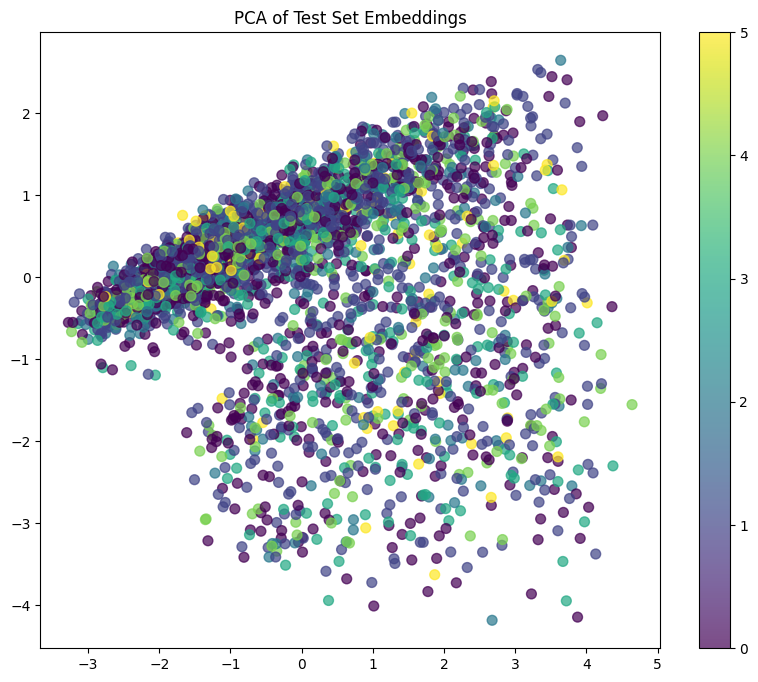

In [ ]:
# Reduce dimensions with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Or with t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_test)

# Plot PCA or t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title('PCA of Test Set Embeddings')
plt.show()

# Replace X_pca with X_tsne in the plot to visualize t-SNE results


### Why Are These Hidden States Useful?

**Contextual Representation**: Unlike traditional word embeddings like Word2Vec or GloVe, which provide a single vector for each word regardless of context, the hidden states in Transformers are contextual. This means that the embedding for a word can vary depending on the surrounding words, capturing nuances in meaning.

**Feature Extraction**: These embeddings can be used as features for downstream tasks like classification, clustering, or as input to other machine learning models. For example, you could use these embeddings as input to a classifier to determine the sentiment of a sentence.

## Applications of Word Embeddings

**Semantic Similarity**: Word embeddings allow us to measure the similarity between words. For example, 'dog' and 'puppy' might be closer in vector space than 'dog' and 'cat'.

**Word Analogies**: We can solve word analogies using embeddings, like 'king' is to 'man' as 'queen' is to 'woman'.

**Text Classification**: Embeddings are crucial in tasks like sentiment analysis, where the goal is to classify text based on its sentiment.

**Named Entity Recognition (NER)**: Embeddings help identify and classify entities like names, locations, and dates in text."

### Word Embeddings Association Bias Test


#### **2. What is Bias in Word Embeddings?**
Bias in word embeddings refers to unintended associations or stereotypes that can be present in the data used to train the embeddings. For example, if a word embedding associates the word "nurse" more closely with female terms and "doctor" with male terms, this could reflect a societal bias present in the training data.

#### **3. Purpose of the Association Bias Test**
The Word Embeddings Association Bias Test is designed to detect and measure the presence of such biases within word embeddings. By analyzing how certain words (like professions) are associated with gendered terms, we can quantify the extent of these biases and assess the fairness of the embeddings.

#### **4. How Does the Test Work?**

##### **Step 1: Define Word Groups**
- **Gendered Words:** These are words that are strongly associated with gender. For example:
  - **Male Words:** "man," "he," "father," "boy," "male"
  - **Female Words:** "woman," "she," "mother," "girl," "female"

- **Target Words:** These are words related to specific concepts or professions you want to test for bias. For example:
  - **Occupation Words:** "doctor," "nurse," "engineer," "teacher," "scientist"

##### **Step 2: Generate Word Embeddings**
- We use a pre-trained transformer model (like BERT) to generate embeddings for each word. In the script, the embeddings are derived from the `[CLS]` token's output for the word, representing it as a dense vector.

##### **Step 3: Calculate Average Embeddings for Gendered Words**
- For each group of gendered words (e.g., male and female words), we calculate an average embedding. This average vector represents the overall concept of "maleness" or "femaleness" in the vector space.

##### **Step 4: Compute Cosine Similarity**
- Cosine similarity measures how similar two vectors are in the vector space. We compute the cosine similarity between the average gendered embeddings and the embeddings of the target words (e.g., occupation words).
- **Cosine Similarity:** A value between -1 and 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarity.

##### **Step 5: Analyze the Bias Scores**
- The resulting cosine similarity scores indicate how closely the target words are associated with male or female terms. For instance, if the word "nurse" has a higher cosine similarity with the female embedding than with the male embedding, it suggests a gender bias in the embeddings.

#### **5. Interpretation of Results**
- **Bias Scores:** The bias scores are the cosine similarity values. Higher scores suggest stronger associations.
  - **Example:** If "engineer" has a higher similarity score with male words than female words, it indicates that the embedding is more likely to associate "engineer" with males, reflecting a potential gender bias.
  
- **Understanding Bias:** By examining these associations, we can understand how word embeddings might reflect or reinforce societal biases. This is crucial for applications where fairness and equity are important, such as in hiring algorithms, recommendation systems, or automated decision-making processes.

#### **6. Implications**
- **Uncovering Bias:** The test helps in uncovering hidden biases in word embeddings, which are often used in NLP tasks like sentiment analysis, translation, and text classification.
- **Mitigating Bias:** Once bias is identified, steps can be taken to mitigate it, such as re-training models on more balanced datasets, using debiasing techniques, or carefully selecting and curating training data.

#### **Conclusion**
The Word Embeddings Association Bias Test is a powerful tool for detecting and quantifying bias in word embeddings. By understanding and addressing these biases, we can create more fair and unbiased NLP models that better reflect the diversity of human language.

### Load Pre-trained Model and Tokenizer:

We use the `bert-base-uncased` model to obtain word embeddings. This model is pre-trained and available through Hugging Face's transformers library.

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')


### Get Embeddings:

The `get_embedding()` function extracts embeddings for a given word by feeding it through the BERT model and using the output of the `[CLS]` token, which serves as a representation for the word.

In [ ]:
# Function to get embeddings for a word
def get_embedding(word):
    inputs = tokenizer(word, return_tensors="pt")
    outputs = model(**inputs)
    # Use the [CLS] token's embedding as the word embedding
    return outputs.last_hidden_state[:, 0, :].detach()

### Calculate Cosine Similarity:

The `cosine_similarity()` function calculates the cosine similarity between two embeddings, which measures the similarity between vectors.

In [ ]:
# Function to calculate cosine similarity between two embeddings
def cosine_similarity(embedding1, embedding2):
    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
    return cos(embedding1, embedding2).item()

### Define gendered words and occupation words

In [ ]:
# Gendered words
male_words = ["man", "he", "father", "boy", "male"]
female_words = ["woman", "she", "mother", "girl", "female"]

# Occupation words
occupation_words = ["doctor", "nurse", "engineer", "teacher", "scientist"]


### Bias Testing:
The script does the following steps:

- calculates average embeddings for groups of male and female words.
- compares these with embeddings of occupation-related words to check for associations and
- provides bias scores for each occupation with respect to male and female embeddings.

In [ ]:
# Calculate average embedding for male and female words
male_embedding = torch.mean(torch.stack([get_embedding(word) for word in male_words]), dim=0)
female_embedding = torch.mean(torch.stack([get_embedding(word) for word in female_words]), dim=0)

# Calculate cosine similarity between gendered words and occupation words
male_bias_scores = {}
female_bias_scores = {}

for occupation in occupation_words:
    occupation_embedding = get_embedding(occupation)
    male_bias_scores[occupation] = cosine_similarity(male_embedding, occupation_embedding)
    female_bias_scores[occupation] = cosine_similarity(female_embedding, occupation_embedding)

The script prints out the **cosine similarity scores**, indicating the strength of association between gendered words and occupation words.

In [ ]:
# Display the results
print("Male Bias Scores:", male_bias_scores)
print("Female Bias Scores:", female_bias_scores)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Male Bias Scores: {'doctor': 0.9758589863777161, 'nurse': 0.9720029830932617, 'engineer': 0.8280553221702576, 'teacher': 0.9615788459777832, 'scientist': 0.9673025608062744}
Female Bias Scores: {'doctor': 0.9745228290557861, 'nurse': 0.9755096435546875, 'engineer': 0.825328528881073, 'teacher': 0.9667810797691345, 'scientist': 0.9696958661079407}


The output provides a dictionary of bias scores for male and female words against the set of occupation words.

You can analyze these scores to assess if certain occupations are more closely associated with male or female terms, which can indicate potential biases in the embeddings.

*HINT*: Feel free to adapt it to other sets of words or different models depending on your needs.